In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def read_fasta(path):

    # open file
    f = open(path, 'r')
    dataline = f.readlines()
    f.close()

    # define variables
    data_strage = {}
    dictionary_name = ''
    dictionary_sequece = ''
    
    # store data as dictionary format
    for data in dataline:
        if data[0] == '>':
            data_strage[dictionary_name] = dictionary_sequece
            dictionary_name = data.lstrip('>').rstrip('\n')
            dictionary_sequece = ''
        else:
            dictionary_sequece += data.rstrip('\n')
    
    # input last data
    data_strage[dictionary_name] = dictionary_sequece
    
    # remove vacance element of data_strage
    data_strage.pop('')
    
    return data_strage



def convert_seqence_to_numpy_array(dictionary):
    
    # define variables
    list_tmp = []
    dictinary_converted = {}
    
    # convert base to number
    for key, value in dictionary.items():
        list_tmp = []
        for num in range(len(value)):
            if value[num] == 'A':
                list_tmp.append(-3)
            elif value[num] == 'T':
                list_tmp.append(-2)
            elif value[num] == 'G':
                list_tmp.append(2)
            elif value[num] == 'C':
                list_tmp.append(3)

    # convert list_tmp to numpy array
        out_array = np.array(list_tmp)

    # set numpy array to dictionary
        dictinary_converted[key] = out_array
        
    return dictinary_converted

In [2]:
d = read_fasta("dna_raw_sequence.fasta")

In [7]:
d2 = convert_seqence_to_numpy_array(d)

In [16]:
m = np.array(list(d2.values()))

In [40]:
m

array([[-3, -2,  2, ..., -2, -3,  2],
       [-3, -2,  2, ..., -2, -3,  2],
       [-3, -2,  2, ..., -2, -3,  2],
       ...,
       [-3, -2,  2, ..., -2, -3, -3],
       [-3, -2,  2, ..., -2, -3, -3],
       [-3, -2,  2, ..., -2, -3, -3]])

In [20]:
mean = np.sum(m,axis=0)/len(m)

In [22]:
diff = m - mean

In [24]:
diff = diff.reshape((13,1128,1))

In [26]:
diffT = diff.transpose((0,2,1))

In [27]:
s = np.matmul(diff,diffT)

In [28]:
sigma = np.sum(s,axis=0)/len(s)

In [30]:
eig_val, eig_vector = np.linalg.eig(sigma)

In [37]:
proj = eig_vector[:,:2]

In [38]:
new_m = m.dot(proj)

In [39]:
new_m

array([[-27.98845979+0.j, -17.28584016+0.j],
       [-27.5460287 +0.j, -17.61140951+0.j],
       [-24.47982675+0.j,   2.30072042+0.j],
       [-25.18462196+0.j,   8.06015855+0.j],
       [-20.24291046+0.j,   0.38127974+0.j],
       [-24.68888883+0.j,   7.95575299+0.j],
       [-26.15178803+0.j,   4.98652878+0.j],
       [-19.35899533+0.j,  13.29724135+0.j],
       [-23.98627215+0.j,  11.41945135+0.j],
       [-25.00580693+0.j, -17.59228783+0.j],
       [ 13.82783987+0.j,  -8.64265731+0.j],
       [ 14.87676327+0.j,   7.7828354 +0.j],
       [ 21.26854262+0.j,  -5.67924531+0.j]])

In [47]:
df_pca = pd.DataFrame(new_m)

In [48]:
df_label = pd.Series(d.keys())

0                     ACTB_human
1                ACTB_chimpanzee
2     ACTB_longtailed_chinchilla
3                       ACTB_cow
4               ACTB_mouse_lemur
5                      ACTB_lion
6                   ACTB_Dolphin
7      ACTB_grater_horseshoe_bat
8        ACTB_siberian_musk_deer
9                     ACTB_drill
10              ACTB_giant_panda
11                  ACTB_chicken
12                    ACTB_coala
dtype: object

In [52]:
df_pca = df_pca.rename(columns={0:'pc1',1:'pc2'})
df_concat = pd.concat([df_pca,df_label],axis=1)
df_concat = df_concat.rename(columns={0:'label'})

In [53]:
df_concat

,pc1,pc2,label
0,-27.988460+0.000000j,-17.285840+0.000000j,ACTB_human
1,-27.546029+0.000000j,-17.611410+0.000000j,ACTB_chimpanzee
2,-24.479827+0.000000j,2.300720+0.000000j,ACTB_longtailed_chinchilla
3,-25.184622+0.000000j,8.060159+0.000000j,ACTB_cow
4,-20.242910+0.000000j,0.381280+0.000000j,ACTB_mouse_lemur
5,-24.688889+0.000000j,7.955753+0.000000j,ACTB_lion
6,-26.151788+0.000000j,4.986529+0.000000j,ACTB_Dolphin
7,-19.358995+0.000000j,13.297241+0.000000j,ACTB_grater_horseshoe_bat
8,-23.986272+0.000000j,11.419451+0.000000j,ACTB_siberian_musk_deer
9,-25.005807+0.000000j,-17.592288+0.000000j,ACTB_drill


/home/elvin/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


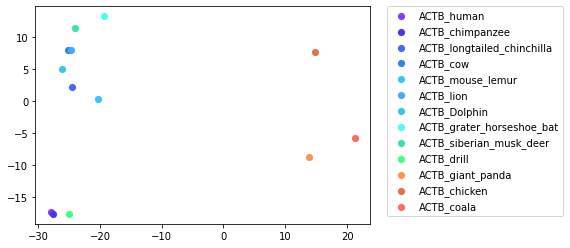

In [56]:
## plot figure (pc1 and pc3)
label_animal = ["ACTB_human", "ACTB_chimpanzee", "ACTB_longtailed_chinchilla", "ACTB_cow", "ACTB_mouse_lemur", "ACTB_lion", "ACTB_Dolphin", "ACTB_grater_horseshoe_bat", "ACTB_siberian_musk_deer", "ACTB_drill", "ACTB_giant_panda", "ACTB_chicken", "ACTB_coala"]
label_color = ["#843DFD", "#4836E3", "#4966FA", "#3681E3", "#3DC2FD", "#42A9FD", "#3BC4E3", "#4EFBED", "#3BE3A5", "#42FD83", "#FD9456", "#E36F4D", "#FA6E62"]
fig, ax = plt.subplots()
for i,c in enumerate(label_color):
    x = df_concat["pc1"][i]
    y = df_concat["pc2"][i]
    l = df_concat["label"][i]
    ax.scatter(x, y, label=l, s=50, linewidth=0.1, c=c)
ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0, fontsize=10)
plt.show()